In [34]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
df = pd.read_csv('Data.csv')
# top20 = df.nlargest(20,['metric_value'])
df = df[df.metric_value > 100]
df = df[df['metric_name'].str.contains('accounts')]
df = df.groupby('metric_name').filter(lambda x: len(x) >= 1000)
count = df['metric_name'].value_counts().head(20) 
print(count)


google.accounts:num_1day_logins                                1577
google.accounts:num_7day_logins                                1577
google.accounts:num_disabled_accounts                          1577
google.accounts:num_suspended_users                            1577
google.accounts:num_users_2sv_not_enrolled                     1577
google.accounts:num_users                                      1577
google.accounts:num_users_2sv_not_enforced                     1577
google.accounts:num_30day_logins                               1577
google.accounts:num_users_2sv_not_enrolled_and_not_enforced    1577
google.accounts:num_authorized_apps                            1542
google.accounts:gmail_used_quota_in_mb                         1490
google.accounts:used_quota_in_mb                               1490
google.accounts:drive_used_quota_in_mb                         1490
google.accounts:gplus_photos_used_quota_in_mb                  1490
google.accounts:num_users_less_secure_apps_acces

In [35]:
df['time'] = pd.to_datetime(df['time'])
df = df[pd.to_datetime(df['time']).dt.month == 5]
df = df[pd.to_datetime(df['time']).dt.year == 2015]

In [36]:

df1= df[df.metric_name == 'google.accounts:num_1day_logins']
df30= df[df.metric_name == 'google.accounts:num_30day_logins']

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


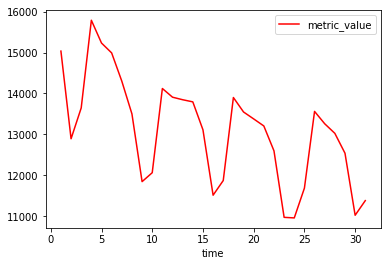

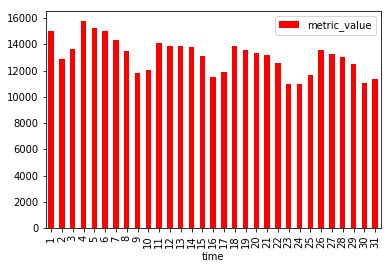

In [37]:
df1["time"] = df1['time'].dt.strftime("%d").astype(int)
ax = plt.gca()
df1.plot(kind='line',x='time',y='metric_value', color='red', ax=ax)
plt.show()
df1.plot(kind='bar',x='time',y='metric_value',color='red')
plt.show()

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


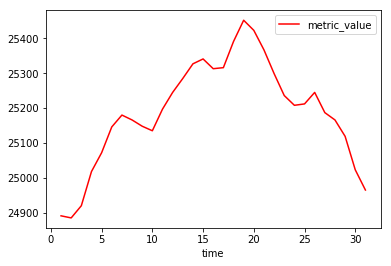

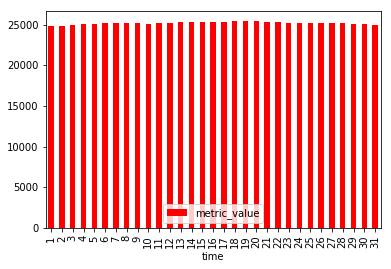

In [38]:
df30["time"] = df30['time'].dt.strftime("%d").astype(int)
ax = plt.gca()
df30.plot(kind='line',x='time',y='metric_value', color='red', ax=ax)
plt.show()
df30.plot(kind='bar',x='time',y='metric_value',color='red')
plt.show()

In [39]:
df1= df[df.metric_name == 'google.accounts:num_1day_logins']
df1= df1['metric_value']
df30= df[df.metric_name == 'google.accounts:num_30day_logins']
df30= df30['metric_value']

NameError: name 'alpha_mle' is not defined

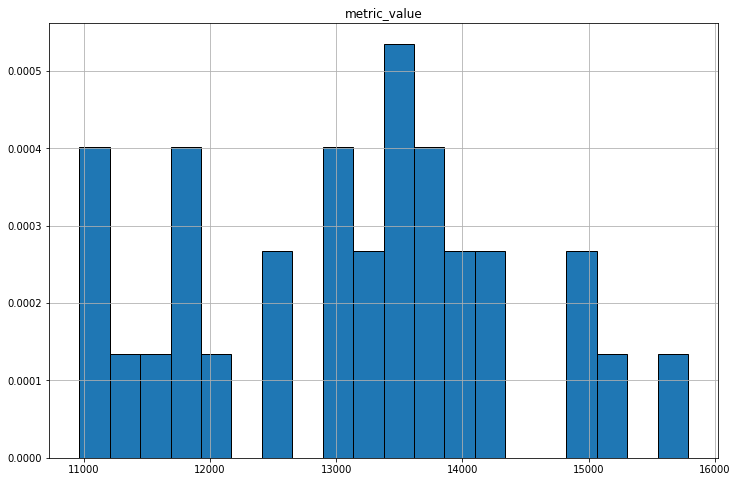

In [46]:
from scipy.stats.distributions import gamma
pd.DataFrame(df1).hist(density=True, bins=20, ec='black', figsize=(12,8))
x = np.linspace(0, pd.DataFrame(df1).max())
l1,=plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--',  label="Maximum Likelihood Estimate")
plt.legend(handles=[l1])